# Notebook 3: Classification using CNN

In this notebook, we will use a CNN model to classify the images, following the approach used in the following [paper](https://ui.adsabs.harvard.edu/abs/2023SPIE12729E..0KC/abstract).

---

### Reading the data

First, we’ll load the saved image and label data from the NumPy files.

In [1]:
import numpy as np  # Importing NumPy for numerical operations and array handling

# Load the images and labels back from the saved NumPy files
all_images_np = np.load('all_images.npy')  # Load image data
all_labels_np = np.load('all_labels.npy')  # Load label data

print("Data loaded successfully from NumPy files.")

Data loaded successfully from NumPy files.


#### Convert Labels to Integer Format

In [2]:
# Create a mapping from string labels to integer labels
label_mapping = {'Blurry': 0, 'Corrupt': 1, 'Missing_Data': 2, 'Noisy': 3, 'Priority': 4}

# Convert string labels to integers using the mapping
all_labels_np = np.array([label_mapping[label] for label in all_labels_np])

print("Labels converted to integer format.")

Labels converted to integer format.


---

### Step 2: Split the Data into Training and Validation Sets


In [9]:
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into training and validation sets

# Split the data: 80% training, 20% validation
train_images, val_images, train_labels, val_labels = train_test_split(
    all_images_np, all_labels_np, test_size=0.4, shuffle = True, stratify=all_labels_np, random_state=42
)

print(f"Training data: {len(train_images)} images")
print(f"Validation data: {len(val_images)} images")

Training data: 9711 images
Validation data: 6474 images


---

### Train CubeCatNet CNN mdoel

We will define and train a Convolutional Neural Network (CNN) model that was defined in [link](https://ui.adsabs.harvard.edu/abs/2023SPIE12729E..0KC/abstract).

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  # Importing Sequential to build the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense  # Importing necessary layers for the CNN
from tensorflow.keras.utils import to_categorical  # Importing utility for converting labels to categorical format

# Set the number of threads used for intra-op parallelism (within individual operations)
# tf.config.threading.set_intra_op_parallelism_threads(5)

# # Set the number of threads used for inter-op parallelism (between operations)
# tf.config.threading.set_inter_op_parallelism_threads(5)

# Convert labels to categorical format for training
train_labels_cat = to_categorical(train_labels)
val_labels_cat = to_categorical(val_labels)

# Define the CNN model architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(512, 512, 3)),  # Convolutional layer + ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(32, (3, 3), activation='relu'),  # Convolutional layer + ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer + ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer + ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(5, activation='softmax')  # Output layer with 5 neurons (one for each class) + Softmax activation
])

# Compile the model with appropriate loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model defined and compiled successfully.")

# Train the model on the training data
history = model.fit(
    train_images, train_labels_cat,
    epochs=10,  # Number of epochs
    batch_size=64,  # Batch size
    validation_data=(val_images, val_labels_cat)  # Validation data
)

print("Model training complete.")

Model defined and compiled successfully.


/idia/projects/hack4dev/CubeSat_ImageClassify/vCube/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 581s 4s/step - accuracy: 0.6970 - loss: 1.1205 - val_accuracy: 0.9013 - val_loss: 0.3128
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 574s 4s/step - accuracy: 0.9525 - loss: 0.1667 - val_accuracy: 0.9858 - val_loss: 0.0564
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 575s 4s/step - accuracy: 0.9897 - loss: 0.0387 - val_accuracy: 0.9957 - val_loss: 0.0192
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 576s 4s/step - accuracy: 0.9934 - loss: 0.0301 - val_accuracy: 0.9972 - val_loss: 0.0088
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 622s 4s/step - accuracy: 0.9977 - loss: 0.0099 - val_accuracy: 0.9964 - val_loss: 0.0107
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 577s 4s/step - accuracy: 0.9889 - loss: 0.0462 - val_accuracy: 0.9869 - val_loss: 0.0566
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 576s 4s/step - accuracy: 0.9913 - loss: 0.0353 - val_accuracy: 0.9954 - val_loss: 0.0185
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 575s 4s/step - accuracy: 0.9962 - loss: 0.0165 - val_accu

---

### Perfomrmance Evaluation

- Confusion Matrix: Provides a visual representation of the model’s performance across all classes, showing the number of correct and incorrect predictions for each class.

203/203 ━━━━━━━━━━━━━━━━━━━━ 66s 326ms/step


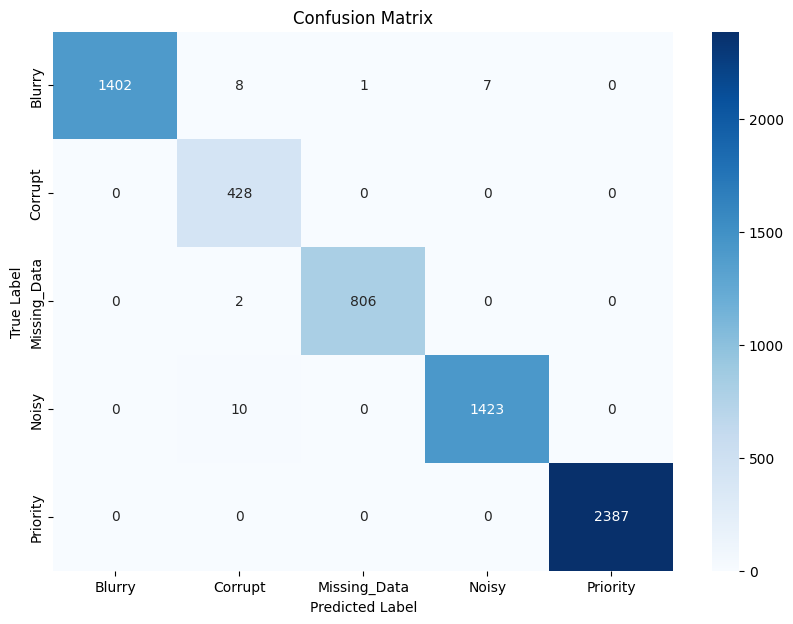

In [11]:
from sklearn.metrics import confusion_matrix, classification_report  # Importing necessary metrics for evaluation
import matplotlib.pyplot as plt  # Importing Matplotlib for visualization
import seaborn as sns  # Importing Seaborn for better visualizations

# Predict the classes of the validation set
val_predictions = model.predict(val_images)
val_pred_classes = np.argmax(val_predictions, axis=1)  # Convert predicted probabilities to class labels

# Generate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


- Classification Report: Shows precision, recall, and F1-score for each class, giving a more detailed evaluation of model performance.


In [12]:
# Generate classification report
class_report = classification_report(val_labels, val_pred_classes, target_names=label_mapping.keys())
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      Blurry       1.00      0.99      0.99      1418
     Corrupt       0.96      1.00      0.98       428
Missing_Data       1.00      1.00      1.00       808
       Noisy       1.00      0.99      0.99      1433
    Priority       1.00      1.00      1.00      2387

    accuracy                           1.00      6474
   macro avg       0.99      1.00      0.99      6474
weighted avg       1.00      1.00      1.00      6474



Measure Inference Time and Resource Usage:
- Time Measurement: We use the time module to record the start and end times to calculate how long the model takes to make predictions.
- Resource Monitoring: psutil is used to monitor CPU and memory usage before and after inference to simulate a production environment scenario.

In [8]:
import time  # Importing time module to measure inference time
import psutil  # Importing psutil for resource usage monitoring

# Assuming train_images_flattened and train_labels are prepared and model is already trained

# Function to measure inference time and resource usage for any model
def measure_inference_performance(model, data, batch_size=64):
    start_time = time.time()  # Record the start time
    process = psutil.Process()  # Get current process information

    # Initialize variables to track CPU and memory usage
    cpu_usages = []
    max_memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB

    # Perform predictions in batches
    for i in range(0, len(data), batch_size):
        batch_data = data[i:i + batch_size]
        _ = model.predict(batch_data)

        # Record CPU and memory usage after each batch
        cpu_usages.append(process.cpu_percent(interval=None))
        current_memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
        max_memory_usage = max(max_memory_usage, current_memory_usage)

    end_time = time.time()  # Record the end time
    inference_time = end_time - start_time  # Calculate total inference time
    average_cpu_usage = sum(cpu_usages) / len(cpu_usages)  # Calculate average CPU usage

    print(f"Inference Time: {inference_time:.4f} seconds")
    print(f"Average CPU Usage: {average_cpu_usage:.2f}%")
    print(f"Maximum Memory Usage: {max_memory_usage:.2f} MB")

# Measure inference performance
measure_inference_performance(model, val_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 485ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 462ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 445ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 496ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 422ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 409ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 336ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

---

Questions or Suggestions:

- How can we develop a performance evaluation that fairly measures different pipelines? Should the evaluation include the full pre-processing pipeline or focus solely on the trained model?
- Should we convert the problem into a binary classification task, or retain the current structure with five classes?
- I am considering not including the full CNN model above, as it requires a significant amount of training time. However, I plan to provide the results in some form so that participants can make comparisons.
- We need a single accuracy metric to simplify the evaluation process.
- How/where should we store the data?
-  It’s essential that no one has access to the testing data, as it will be secured exclusively for the final evaluation (After the hackathons).
-  We need the paper to be online soon (before the trainers hack if possible)